# <center><font size=10>**SENTIMENT ANALYSIS PROJECT**
#<center><font size=8>**ANGER VS. PEACE**<font>
#<center><font size=8>**SERIOUS VS. FUN**<font>

<font size=6, color=red><center>**Prepared by:**
<font size=6, color=green><center>**Team Data Fingers**
<font size=6, color=green><center>**(Casey Gonder, Dipa Patra, Vincent Techo)**

# Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

# Data Preprocessing

In [2]:
# Loading anger vs. peace data
data_peace = pd.read_csv("Anger_Peace_DATASET.csv")
data_peace

,Text,Anger(-1)_Peace(1)
0,*screams in 25 different languages*,0.0
1,Families to sue over Legionnaires: More than 4...,-1.0
2,Pandemonium In Aba As Woman Delivers Baby With...,0.0
3,My emotions are a train wreck. My body is a tr...,-1.0
4,Alton brown just did a livestream and he burne...,0.0
...,...,...
6856,IDFC official Vikram Limaye,0.0
6857,former captain Diana Edulji are others in pane...,0.0
6858,Supreme Court names former CAG as head of 4-me...,0.0
6859,Court summons CM suspended BJP MP as accused i...,0.0


In [3]:
# Loading serious vs. fun data
data_fun = pd.read_csv("Serious_Fun_DATASET.csv")
data_fun

,Text,Serious(-1)_Fun(1)
0,*screams in 25 different languages*,-1.0
1,Families to sue over Legionnaires: More than 4...,-1.0
2,Pandemonium In Aba As Woman Delivers Baby With...,-1.0
3,My emotions are a train wreck. My body is a tr...,0.0
4,Alton brown just did a livestream and he burne...,1.0
...,...,...
6421,IDFC official Vikram Limaye,0.0
6422,former captain Diana Edulji are others in pane...,0.0
6423,Supreme Court names former CAG as head of 4-me...,0.0
6424,Court summons CM suspended BJP MP as accused i...,0.0


In [4]:
data_peace.shape

(6861, 2)

In [5]:
data_fun.shape

(6426, 2)

In [6]:
data_peace.isna().sum()

Text                  1
Anger(-1)_Peace(1)    6
dtype: int64

In [7]:
data_fun.isna().sum()

Text                  0
Serious(-1)_Fun(1)    6
dtype: int64

In [8]:
data_peace.dropna(inplace=True)
data_peace.isna().sum()

Text                  0
Anger(-1)_Peace(1)    0
dtype: int64

In [9]:
data_fun.dropna(inplace=True)
data_fun.isna().sum()

Text                  0
Serious(-1)_Fun(1)    0
dtype: int64

In [10]:
# Change feature headings
data_peace.rename(columns={"Text": "sentence", "Anger(-1)_Peace(1)": "cluster"}, inplace=True)
data_peace

,sentence,cluster
0,*screams in 25 different languages*,0.0
1,Families to sue over Legionnaires: More than 4...,-1.0
2,Pandemonium In Aba As Woman Delivers Baby With...,0.0
3,My emotions are a train wreck. My body is a tr...,-1.0
4,Alton brown just did a livestream and he burne...,0.0
...,...,...
6856,IDFC official Vikram Limaye,0.0
6857,former captain Diana Edulji are others in pane...,0.0
6858,Supreme Court names former CAG as head of 4-me...,0.0
6859,Court summons CM suspended BJP MP as accused i...,0.0


In [11]:
data_fun.rename(columns={"Text": "sentence", "Serious(-1)_Fun(1)": "cluster"}, inplace=True)
data_fun

,sentence,cluster
0,*screams in 25 different languages*,-1.0
1,Families to sue over Legionnaires: More than 4...,-1.0
2,Pandemonium In Aba As Woman Delivers Baby With...,-1.0
3,My emotions are a train wreck. My body is a tr...,0.0
4,Alton brown just did a livestream and he burne...,1.0
...,...,...
6421,IDFC official Vikram Limaye,0.0
6422,former captain Diana Edulji are others in pane...,0.0
6423,Supreme Court names former CAG as head of 4-me...,0.0
6424,Court summons CM suspended BJP MP as accused i...,0.0


In [12]:
data_peace.shape, data_fun.shape

((6854, 2), (6420, 2))

In [13]:
encode = {0:0,-1:2,1:1}
labels = data_peace['cluster'].replace(encode)
labels = tf.keras.utils.to_categorical(labels,3)
dataset_peace =  tf.data.Dataset.from_tensor_slices((data_peace['sentence'], labels))

In [14]:
encode = {0:0,-1:2,1:1}
labels = data_fun['cluster'].replace(encode)
labels = tf.keras.utils.to_categorical(labels,3)
dataset_fun =  tf.data.Dataset.from_tensor_slices((data_fun['sentence'], labels))

In [15]:
train_batch_peace, train_labels_batch_peace = next(iter(dataset_peace.batch(10)))

In [16]:
train_batch_fun, train_labels_batch_fun = next(iter(dataset_fun.batch(10)))

# Model Architecture

In [17]:
embedding = "https://tfhub.dev/google/universal-sentence-encoder-large/5"

hub_layer = hub.KerasLayer(embedding, input_shape=[],dtype=tf.string, trainable = False)

In [18]:
model_peace = keras.Sequential(name='model_peace')

In [19]:
model_fun = keras.Sequential(name='model_fun')

In [20]:
# Anger_Peace MODEL ARCHITECHTURE

model_peace.add(hub_layer)     # a layer imported from TensorFlow Hub.
                         # This layer is responsible for processing the input text data
                         # and generating word embeddings.
# Add Dense Layer 1
model_peace.add(keras.layers.Dense(128, activation ='relu'))  # dense layer with 128 units (neurons)
                                                       #  The activation function ReLU (Rectified Linear Unit),
                                                       # introduces non-linearity by setting negative values to zero
                                                       # and leaving positive values unchanged.
# Add Dense Layer 2
model_peace.add(keras.layers.Dense(64, activation = 'relu')) # add another dense layer with 64 neurons
# Add dropout layer (regularization layer) after dense layer
model_peace.add(keras.layers.Dropout(0.2)) # adds a dropout (regularization) layer to prevent overfitting.
                                     # Dropout is a regularization technique that
                                     # randomly sets a fraction (0.2 in this case) of the input units to 0 during training,
                                     # to  help prevent overfitting.

# Add Dense Layer 3
model_peace.add(keras.layers.Dense(32, activation='relu'))
model_peace.add(keras.layers.Dropout(0.2))  # It is not neccessary to add a regularizarion layer after every dense layer.

# Add Dense Layer 4
model_peace.add(keras.layers.Dense(32, activation='relu'))
model_peace.add(keras.layers.Dropout(0.2))

# Add Dense Layer 5: Output Layer
model_peace.add(keras.layers.Dense(3, activation='softmax')) # adds the last dense layer with 3 units,
                                                       # representing the three classes in the NLP classification problem.
                                                       # The activation function used here is softmax.
                                                       # softmax produces a probability distribution over the classes.

In [21]:
# Serious_Fun MODEL ARCHITECHTURE

model_fun.add(hub_layer)
# Dense Layer 1
model_fun.add(keras.layers.Dense(128, activation ='relu'))
# Dense Layer 2
model_fun.add(keras.layers.Dense(64, activation = 'relu'))
model_fun.add(keras.layers.Dropout(0.2))
# Dense Layer 3
model_fun.add(keras.layers.Dense(32, activation='relu'))
model_fun.add(keras.layers.Dropout(0.2))
# Dense Layer 4
model_fun.add(keras.layers.Dense(32, activation='relu'))
model_fun.add(keras.layers.Dropout(0.2))
# Dense Layer 5
model_fun.add(keras.layers.Dense(3, activation='softmax'))

In [22]:
model_peace.summary()

Model: "model_peace"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               147354880 
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                

In [23]:
model_fun.summary()

Model: "model_fun"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               147354880 
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                10

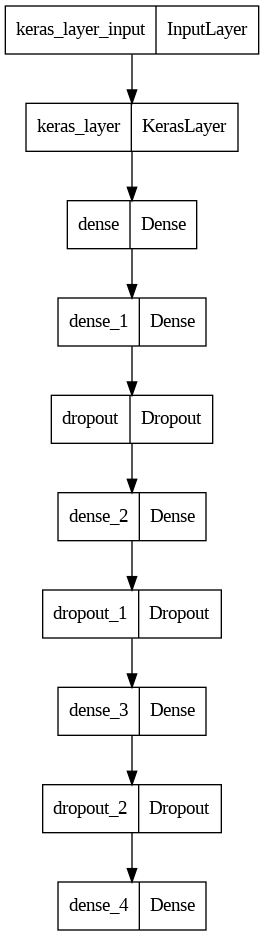

In [24]:
# Plot the peace model
tf.keras.utils.plot_model(model_peace, show_shapes=False)

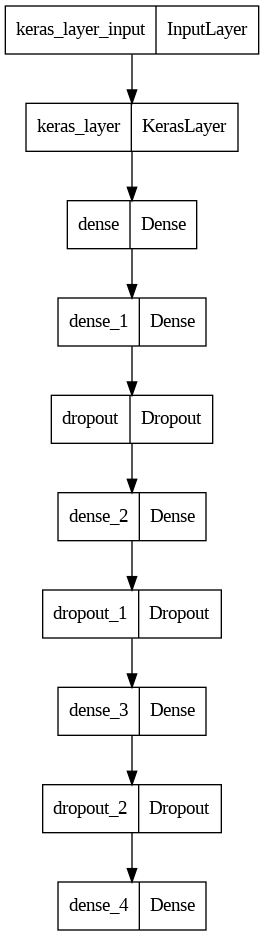

In [25]:
# Plot the fun model
tf.keras.utils.plot_model(model_peace, show_shapes=False)

# Compile the Models

In [26]:
# Compile the models
model_peace.compile(optimizer='Nadam', loss = "categorical_crossentropy", metrics = ['accuracy'])
model_fun.compile(optimizer='Nadam', loss = "categorical_crossentropy", metrics = ['accuracy'])

In [27]:
# Shuffle the data to introduce randomness and reduce potential bias during training
dataset_peace = dataset_peace.shuffle(1000) #  1000 = buffer size.
                                #  TensorFlow will load 1000 elements from the dataset into the buffer
                                 # and randomly sample from these elements to create the shuffled dataset.
                                # Should depend on size of dataset and amount of shuffle you wish to achieve
                                # Also depends on memory availabbility .
                                  # for small dataset use buffer size = n (size of dataset)
                                  # for large dataset use buffer zize < n to save memory

dataset_fun = dataset_fun.shuffle(1000)

# Train the Models

In [28]:
# Split the tensorflow dataset_peace into train-test split

# Determine the total size of the dataset_peace
dataset_size_peace = tf.data.experimental.cardinality(dataset_peace).numpy()

# Define the sizes of the training, validation, and test sets
train_size_peace = int(0.7 * dataset_size_peace)  # 70% for training
val_size_peace = int(0.16 * dataset_size_peace)  # 16% for validation
test_size_peace = dataset_size_peace - train_size_peace - val_size_peace  # Remaining for testing


# Split the dataset_peace into training, validation, and test sets
train_data_peace = dataset_peace.take(train_size_peace)
remaining_data_peace = dataset_peace.skip(train_size_peace)
val_data_peace = remaining_data_peace.take(val_size_peace)
test_data_peace = remaining_data_peace.skip(val_size_peace)

In [29]:
# Split the tensorflow dataset_fun into train-test split

# Determine the total size of the dataset_fun
dataset_size_fun = tf.data.experimental.cardinality(dataset_fun).numpy()

# Define the sizes of the training, validation, and test sets
train_size_fun = int(0.7 * dataset_size_fun)  # 70% for training
val_size_fun = int(0.16 * dataset_size_fun)  # 16% for validation
test_size_fun = dataset_size_fun - train_size_fun - val_size_fun  # Remaining for testing


# Split the dataset_fun into training, validation, and test sets
train_data_fun = dataset_fun.take(train_size_fun)
remaining_data_fun = dataset_fun.skip(train_size_fun)
val_data_fun = remaining_data_fun.take(val_size_fun)
test_data_fun = remaining_data_fun.skip(val_size_fun)

In [30]:
print(f"""Train Peace data size: {len(train_data_peace)}
\nValidation Peace data size: {len(val_data_peace)}
\nTest Peace data size: {len(test_data_peace)}""")

Train Peace data size: 4797 

Validation Peace data size: 1096 

Test Peace data size: 961


In [31]:
print(f"""Train Fun data size: {len(train_data_fun)}
\nValidation Fun data size: {len(val_data_fun)}
\nTest Fun data size: {len(test_data_fun)}""")

Train Fun data size: 4494 

Validation Fun data size: 1027 

Test Fun data size: 899


In [32]:
# Train Peace Model
history_peace = model_peace.fit(train_data_peace.shuffle(1000).batch(128), epochs = 17,
                    validation_data= val_data_peace.batch(128), verbose = 2)

Epoch 1/17
38/38 - 94s - loss: 0.9346 - accuracy: 0.6075 - val_loss: 1.0495 - val_accuracy: 0.3458 - 94s/epoch - 2s/step
Epoch 2/17
38/38 - 75s - loss: 0.5717 - accuracy: 0.7336 - val_loss: 0.9092 - val_accuracy: 0.3531 - 75s/epoch - 2s/step
Epoch 3/17
38/38 - 63s - loss: 0.5044 - accuracy: 0.7684 - val_loss: 0.7897 - val_accuracy: 0.5027 - 63s/epoch - 2s/step
Epoch 4/17
38/38 - 63s - loss: 0.4582 - accuracy: 0.7999 - val_loss: 0.6593 - val_accuracy: 0.7172 - 63s/epoch - 2s/step
Epoch 5/17
38/38 - 63s - loss: 0.4204 - accuracy: 0.8253 - val_loss: 0.5319 - val_accuracy: 0.8467 - 63s/epoch - 2s/step
Epoch 6/17
38/38 - 66s - loss: 0.3842 - accuracy: 0.8437 - val_loss: 0.4262 - val_accuracy: 0.8887 - 66s/epoch - 2s/step
Epoch 7/17
38/38 - 63s - loss: 0.3490 - accuracy: 0.8672 - val_loss: 0.3422 - val_accuracy: 0.9069 - 63s/epoch - 2s/step
Epoch 8/17
38/38 - 63s - loss: 0.3018 - accuracy: 0.8845 - val_loss: 0.2547 - val_accuracy: 0.9288 - 63s/epoch - 2s/step
Epoch 9/17
38/38 - 64s - loss: 0

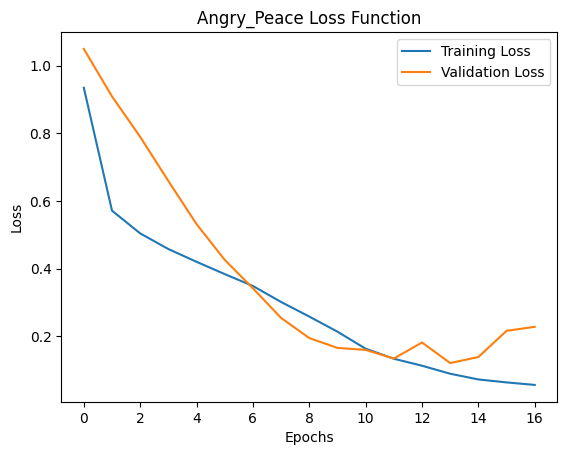

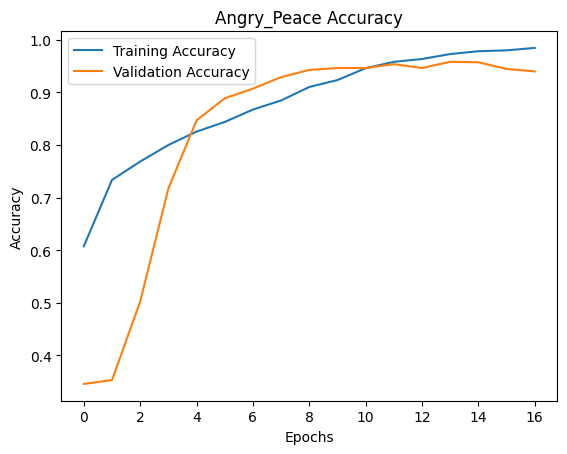

In [52]:
# Training history graph for Angry_Peace model

# Retrieve the training and validation metrics from history_peace
train_loss = history_peace.history['loss']
val_loss = history_peace.history['val_loss']
train_accuracy = history_peace.history['accuracy']
val_accuracy = history_peace.history['val_accuracy']

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title("Angry_Peace Loss Function")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title("Angry_Peace Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [34]:
# Keep best model at epoch 17

In [35]:
# Train Fun Model
history_fun = model_fun.fit(train_data_fun.shuffle(1000).batch(128), epochs = 25,
                    validation_data= val_data_fun.batch(128), verbose = 2)

Epoch 1/25
36/36 - 91s - loss: 1.0165 - accuracy: 0.5189 - val_loss: 1.1467 - val_accuracy: 0.2610 - 91s/epoch - 3s/step
Epoch 2/25
36/36 - 64s - loss: 0.8139 - accuracy: 0.6190 - val_loss: 1.1434 - val_accuracy: 0.2921 - 64s/epoch - 2s/step
Epoch 3/25
36/36 - 65s - loss: 0.7338 - accuracy: 0.6816 - val_loss: 1.0860 - val_accuracy: 0.2687 - 65s/epoch - 2s/step
Epoch 4/25
36/36 - 66s - loss: 0.7272 - accuracy: 0.6820 - val_loss: 1.0020 - val_accuracy: 0.2726 - 66s/epoch - 2s/step
Epoch 5/25
36/36 - 64s - loss: 0.7100 - accuracy: 0.6929 - val_loss: 0.8014 - val_accuracy: 0.7011 - 64s/epoch - 2s/step
Epoch 6/25
36/36 - 66s - loss: 0.6680 - accuracy: 0.7287 - val_loss: 0.6165 - val_accuracy: 0.8306 - 66s/epoch - 2s/step
Epoch 7/25
36/36 - 65s - loss: 0.6347 - accuracy: 0.7488 - val_loss: 0.4893 - val_accuracy: 0.8627 - 65s/epoch - 2s/step
Epoch 8/25
36/36 - 66s - loss: 0.5997 - accuracy: 0.7652 - val_loss: 0.4015 - val_accuracy: 0.8754 - 66s/epoch - 2s/step
Epoch 9/25
36/36 - 65s - loss: 0

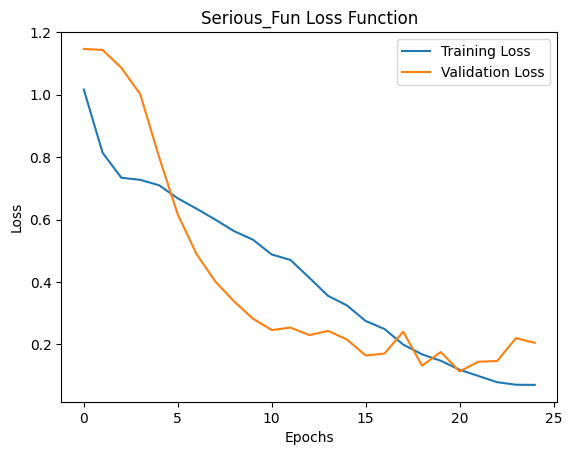

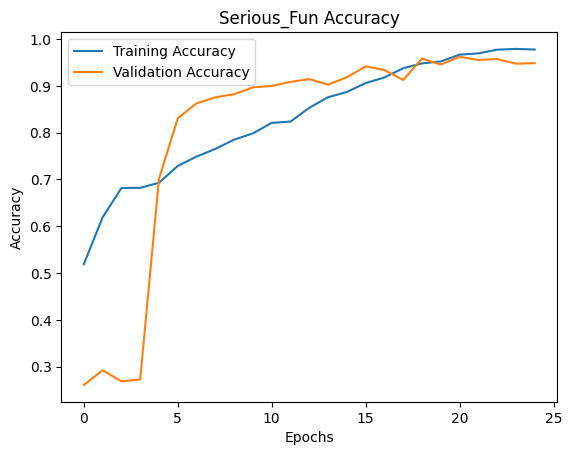

In [36]:
# Training history graph for Serious_Fun model

# Retrieve the training and validation metrics from history_fun
train_loss = history_fun.history['loss']
val_loss = history_fun.history['val_loss']
train_accuracy = history_fun.history['accuracy']
val_accuracy = history_fun.history['val_accuracy']

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title("Serious_Fun Loss Function")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title("Serious_Fun Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [37]:
# Keep best model at epoch 21

# Evaluate the Models

In [38]:
# Test Accuracy: Peace Model
test_metrics_peace = model_peace.evaluate(test_data_peace.batch(128))

print(f" Peace Model Test Accuracy: {test_metrics_peace[1]*100: .2f}%")
print(f" Peace Model Test Loss: {test_metrics_peace[0]: .4f}")

8/8 [==============================] - 8s 1s/step - loss: 0.2503 - accuracy: 0.9396
 Peace Model Test Accuracy:  93.96%
 Peace Model Test Loss:  0.2503


In [39]:
# Test Accuracy: Fun Model
test_metrics_fun = model_fun.evaluate(test_data_fun.batch(128))

print(f" Fun Model Test Accuracy: {test_metrics_fun[1]*100: .2f}%")
print(f" Fun Model Test Loss: {test_metrics_fun[0]: .4f}")

8/8 [==============================] - 7s 862ms/step - loss: 0.2135 - accuracy: 0.9488
 Fun Model Test Accuracy:  94.88%
 Fun Model Test Loss:  0.2135


# Serialize (save) the Models

In [40]:
# # Save the peace model
# dataset_peace_name = 'peace'
# saved_model_peace_path = './{}_bert'.format(dataset_peace_name.replace('/', '_'))

# model_peace.save(saved_model_peace_path, include_optimizer=False)

In [53]:
# Save moddels as h5 files

model_peace.save('peace_model.h5')

model_fun.save('fun_model.h5')

# Making Predictions

## Functions to use

In [54]:
# Load Models

import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import load_model
import tensorflow_hub as hub
# Define hub layer
embedding = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
hub_layer = hub.KerasLayer(embedding, input_shape=[],dtype=tf.string, trainable = False)

# Add hub layer
keras.utils.get_custom_objects().update({"KerasLayer": hub_layer})

# Load the models
funmodel = keras.models.load_model('/content/fun_model.h5')
peacemodel = keras.models.load_model('/content/peace_model.h5')

In [55]:
# # Function to predict Anger vs. Peace

# def predict_Anger_Peace():
#   text = input('Text to be predicted:\n')
#   text =  [text]
#   # Perform prediction
#   predictions = peacemodel.predict(text).argmax()

#   # Interpret the predictions
#   if predictions == 2:
#     print("ANGRY Text")
#   elif predictions == 1:
#     print("PEACEFUL Text")
#   else:
#     print("NEUTRAL Text")


In [56]:
# # Function to predict Serious vs. Fun

# def predict_Serious_Fun():
#   text = input('Text to be predicted:\n')
#   text =  [text]
#   # Perform prediction
#   predictions = funmodel.predict(text).argmax()

#   # Interpret the predictions
#   if predictions == 2:
#     print("SERIOUS Text")
#   elif predictions == 1:
#     print("FUN Text")
#   else:
#     print("NEUTRAL Text")

In [80]:
# Function to predict both

def predict_Sentiments():
  text = input('Text to be predicted:\n')
  text =  [text]
  # Perform prediction
  fun_prediction = funmodel.predict(text).argmax()
  peace_prediction = peacemodel.predict(text).argmax()


  # Interpret the predictions
  if (peace_prediction == 2) & (fun_prediction ==2):
    print("This text is ANGRY and SERIOUS")

  elif (peace_prediction == 2) & (fun_prediction ==1):
    print("This text is ANGRY but FUN")

  elif (peace_prediction == 2) & (fun_prediction == 0):
    print("This text is ANGRY, but NOT SERIOUS and NOT FUN")

  elif (peace_prediction == 1) & (fun_prediction == 2):
    print("This text is PEACEFUL but  SERIOUS")

  elif (peace_prediction == 1) & (fun_prediction == 1):
    print("This text is PEACEFUL and FUN")

  elif (peace_prediction == 1) & (fun_prediction == 0):
    print("This text is PEACEFUL, but NOT SERIOUS and NOT FUN")

  elif (peace_prediction == 0) & (fun_prediction == 2):
    print("This text is NOT ANGRY, NOT PEACEFUL but SERIOUS")

  elif (peace_prediction == 0) & (fun_prediction == 1):
    print("This text is NOT ANGRY, NOT PEACE but FUN")

  elif (peace_prediction == 0) & (fun_prediction == 0):
    print("This text is completely Neutral")

## Some Predictions

In [66]:
predict_Anger_Peace()

Text to be predicted:
Started to cry, but then remembered I can buy myself flowers
1/1 [==============================] - 0s 77ms/step
ANGRY Text


In [68]:
predict_Serious_Fun()

Text to be predicted:
Started to cry, but then remembered I can buy myself flowers
1/1 [==============================] - 0s 113ms/step
FUN Text


In [70]:
predict_Anger_Peace()

Text to be predicted:
Be Excellent to each other! 
1/1 [==============================] - 0s 66ms/step
ANGRY Text


In [73]:
predict_Sentiments()

Text to be predicted:
his was a complete waste of my time, I bet these people voted for that evil candidate that hates everyone. They should just quit and go home
1/1 [==============================] - 0s 94ms/step
This text is ANGRY and SERIOUS


In [74]:
predict_Sentiments()

Text to be predicted:
You little son of a bitch ball! Why you don't you just go HOME? That's your HOME! Are you too good for your HOME? ANSWER ME! SUCK MY WHITE ASS, BALL!
1/1 [==============================] - 0s 91ms/step
This text is ANGRY but FUN


In [75]:
predict_Sentiments()

Text to be predicted:
It's funny how I feel lonely all the time. sometimes I laugh at how suicidal I feel, but sometimes it is too much to bear.
1/1 [==============================] - 0s 82ms/step
This text is ANGRY and SERIOUS


In [76]:
predict_Sentiments()

Text to be predicted:
Repeating in my head If I can't be my own I'd feel better dead
1/1 [==============================] - 0s 88ms/step
This text is ANGRY and SERIOUS


In [78]:
predict_Sentiments()

Text to be predicted:
Started to cry, but then remembered I can buy myself flowers
1/1 [==============================] - 0s 79ms/step
This text is ANGRY but FUN


In [82]:
predict_Sentiments()

Text to be predicted:
Be Excellent to each other
1/1 [==============================] - 0s 71ms/step
This text is ANGRY, but NOT SERIOUS and NOT FUN


In [84]:
predict_Sentiments()

Text to be predicted:
damn it!
1/1 [==============================] - 0s 81ms/step
This text is completely Neutral


In [85]:
predict_Sentiments()

Text to be predicted:
i'm mad now. I need to kick some butts
1/1 [==============================] - 0s 78ms/step
This text is ANGRY and SERIOUS
